<a href="https://colab.research.google.com/github/shruthi112/Early-Cataract-Detection/blob/master/cataract_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


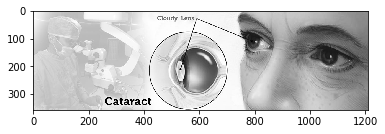

In [3]:
data="/content/gdrive/My Drive/training"
categories=["cataract","non-cataract"] 
for category in categories:
  path=os.path.join(data,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break
 

In [4]:
print(img_array)

[[253 253 252 ... 144 143 143]
 [253 253 252 ... 143 142 142]
 [253 253 252 ... 142 142 142]
 ...
 [228 228 227 ... 121 126 126]
 [228 228 226 ... 123 123 123]
 [228 228 226 ... 123 123 123]]


In [5]:
print(img_array.shape)

(357, 1210)


In [6]:
print(len(img_array))

357


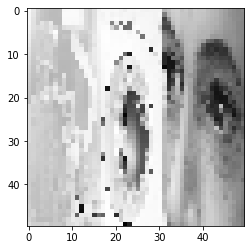

In [7]:
img_size=50
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join(data,category)
    class_num=categories.index(category)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array=cv2.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass

create_training_data()  

In [9]:
print(len(training_data))

362


In [0]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
  print(sample[1])

1
1
1
0
0
1
1
1
1
1


In [0]:
X=[]#featureset
y=[]#labels


In [0]:
for features,label in training_data:
  X.append(features)
  y.append(label)
  
X=np.array(X).reshape(-1, img_size, img_size, 1)

In [0]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [15]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
X[1]

array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[173],
        [124],
        [158],
        ...,
        [186],
        [164],
        [133]],

       [[177],
        [115],
        [157],
        ...,
        [183],
        [168],
        [134]],

       [[175],
        [124],
        [147],
        ...,
        [184],
        [165],
        [138]]], dtype=uint8)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))

In [18]:
 X=X/255.0
model=Sequential()

model.add(  Conv2D( 64,(3,3), input_shape=X.shape[1:])  )#layer1
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(  Conv2D(64,(3,3)) )#layer2
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())#layer3
model.add(Dense(64))

model.add(Dense(1))#output layer
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

history=model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)
history

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 289 samples, validate on 73 samples
Epoch 1/10
289/289 [==============================] - 2s 8ms/sample - loss: 0.7573 - acc: 0.5467 - val_loss: 0.7126 - val_acc: 0.5342
Epoch 2/10
289/289 [==============================] - 2s 6ms/sample - loss: 0.6629 - acc: 0.6159 - val_loss: 0.8118 - val_acc: 0.5342
Epoch 3/10
289/289 [==============================] - 2s 6ms/sample - loss: 0.6736 - acc: 0.6228 - val_loss: 0.6471 - val_acc: 0.7123
Epoch 4/10
289/289 [==============================] - 2s 6ms/sample - loss: 0.6192 - acc: 0.6125 - val_loss: 0.8408 - val_acc: 0.5342
Epoch 5/10
289/289 [==============================] - 2s 6ms/sample - loss: 0.6554 - acc: 0.6194 - val_loss: 0.6331 - val_acc: 0.6986
Epoch 6/10
289/289 [==============================] - 2s 5ms/sample - loss: 0.6091 - acc: 0.6817 - val_loss: 0